<a href="https://colab.research.google.com/github/Raaghul32/TensorFlow/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=2c3f2c9e3c87e668cf1ffa286ceca4734edca005fc841b7edb6db20cb02b0298
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [0]:
from minisom import MiniSom

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('Credit_Card_Applications.csv')

In [0]:
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [102]:
X.shape
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
data=sc.fit_transform(X)

In [104]:
data

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [0]:
seli=MiniSom(10,10,input_len=15)

In [0]:
seli.random_weights_init(data)

In [0]:
seli.train_random(data=data,num_iteration=100)

In [0]:
from pylab import bone,pcolor,plot,show,colorbar

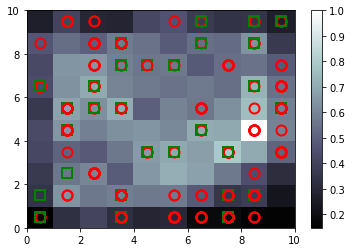

In [109]:
bone()
pcolor(seli.distance_map().T)
colorbar()
markers =['o','s']
colors = ['r','g']
for i,x in enumerate(data):
  w=seli.winner(x)
  plot(w[0]+.5,w[1]+.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()

In [112]:
mappings= seli.win_map(data)
mappings

defaultdict(list,
            {(0,
              0): [array([0.31526975, 1.        , 0.29699248, 0.0625    , 0.5       ,
                     1.        , 0.875     , 0.15789474, 1.        , 1.        ,
                     0.05970149, 1.        , 0.5       , 0.1265    , 0.00857   ]), array([0.08079959, 1.        , 0.41609023, 0.17857143, 0.5       ,
                     0.76923077, 0.875     , 0.1754386 , 1.        , 1.        ,
                     0.08955224, 1.        , 0.5       , 0.235     , 0.        ]), array([0.17475744, 1.        , 0.10406015, 0.04464286, 0.        ,
                     0.53846154, 0.875     , 0.04824561, 1.        , 1.        ,
                     0.04477612, 1.        , 0.5       , 0.07      , 0.0021    ]), array([0.59413604, 1.        , 0.28571429, 0.05357143, 0.5       ,
                     0.92307692, 0.875     , 0.19298246, 1.        , 1.        ,
                     0.04477612, 1.        , 0.5       , 0.        , 0.        ]), array([0.08973327, 1. 

In [0]:
frauds = np.concatenate((mappings[(8,1)],mappings[(1,5)]),axis=0)

In [0]:
frauds= sc.inverse_transform(frauds)

In [0]:
frauds=pd.DataFrame(frauds)

In [118]:
frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15692408.0,1.0,48.08,6.040,2.0,4.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0,2691.0
1,15694530.0,1.0,41.17,1.335,2.0,2.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,168.0,1.0
2,15605791.0,1.0,19.50,9.585,2.0,6.0,4.0,0.790,0.0,0.0,0.0,0.0,2.0,80.0,351.0
3,15667451.0,1.0,39.92,5.000,2.0,3.0,5.0,0.210,0.0,0.0,0.0,0.0,2.0,550.0,1.0
4,15571415.0,1.0,37.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0,1.0
5,15565714.0,1.0,42.75,4.085,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,108.0,101.0
6,15699340.0,1.0,23.17,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0,1.0
7,15608688.0,1.0,15.17,7.000,2.0,10.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,600.0,1.0
8,15609070.0,1.0,18.00,0.165,2.0,11.0,7.0,0.210,0.0,0.0,0.0,0.0,2.0,200.0,41.0
9,15650313.0,1.0,37.50,0.835,2.0,10.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,120.0,6.0


In [0]:
frauds= frauds.iloc[:,0:1].values

In [120]:
frauds

array([[15692408.],
       [15694530.],
       [15605791.],
       [15667451.],
       [15571415.],
       [15565714.],
       [15699340.],
       [15608688.],
       [15609070.],
       [15650313.],
       [15565996.],
       [15644400.],
       [15684440.],
       [15581871.],
       [15617065.],
       [15636626.],
       [15620103.],
       [15588019.],
       [15575146.],
       [15652667.],
       [15686461.],
       [15684512.],
       [15680643.],
       [15692137.],
       [15668830.],
       [15796569.],
       [15712877.],
       [15691150.],
       [15573520.],
       [15740458.],
       [15686885.],
       [15585928.],
       [15680895.],
       [15807546.],
       [15583067.],
       [15773869.],
       [15796111.],
       [15578722.],
       [15809800.],
       [15623072.],
       [15676909.],
       [15802071.],
       [15790630.],
       [15750055.],
       [15647898.],
       [15679801.],
       [15569682.],
       [15587038.],
       [15592773.],
       [15732943.],


In [0]:
customer=df.iloc[:,1:].values

In [0]:
is_fraud= np.zeros(len(df))

In [0]:
for i in range(len(df)):
  if df.iloc[i,0] in frauds:
    is_fraud[i]=int(1.0)
  else:
    is_fraud[i]=int(0.0)

In [142]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customer=sc.fit_transform(customer)

In [127]:
x_data.shape

(690, 15)

In [0]:
fraudchck= Sequential()
fraudchck.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_shape=(15,)))
fraudchck.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
fraudchck.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [149]:
fraudchck.fit(customer,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.9145
Epoch 2/2
690/690 [==============================] - 1s 909us/step - loss: 0.3565 - accuracy: 0.9145


In [0]:
predict= fraudchck.predict(customer)

In [151]:
predict

array([[0.15277368],
       [0.04112428],
       [0.02852929],
       [0.17115879],
       [0.33577543],
       [0.1349904 ],
       [0.08366832],
       [0.32096505],
       [0.06993759],
       [0.23351967],
       [0.33577543],
       [0.33577543],
       [0.16062957],
       [0.33577543],
       [0.20399067],
       [0.24575344],
       [0.33577543],
       [0.15211248],
       [0.04619089],
       [0.22726238],
       [0.03750968],
       [0.05051777],
       [0.09712011],
       [0.20478722],
       [0.10781074],
       [0.33577543],
       [0.04676113],
       [0.33577543],
       [0.20031226],
       [0.33577543],
       [0.33577543],
       [0.04189375],
       [0.26145846],
       [0.33577543],
       [0.21691859],
       [0.13554609],
       [0.33577543],
       [0.33577543],
       [0.33577543],
       [0.33577543],
       [0.25      ],
       [0.06443202],
       [0.33577543],
       [0.3166424 ],
       [0.04996321],
       [0.20024458],
       [0.02134445],
       [0.131

In [0]:
predict= np.concatenate((df.iloc[:,0:1],predict),axis=1)


In [0]:
predict= predict[predict[:,1].argsort()]

In [0]:
final=pd.DataFrame(predict)

In [0]:
final.columns=['Id','Probability']

In [156]:
final

,Id,Probability
0,15608916.0,0.015393
1,15694666.0,0.015719
2,15611409.0,0.015768
3,15752344.0,0.016954
4,15593959.0,0.018367
...,...,...
685,15593694.0,0.335775
686,15744423.0,0.335775
687,15794868.0,0.335775
688,15568819.0,0.335775


In [0]:
result=final[final['Probability']>=0.4]

In [162]:
result

,Id,Probability
